In [1]:
import json
import funzioni_per_elaborazione_linguaggio as fel
import joblib

In [2]:
datasetPost=json.load(open("dataset/dictCompleto.json"))

In [12]:
dictPost={}
for poster,listaPost in datasetPost.items():
    for post in listaPost:
        dictPost[post["id"]]=post.copy()
        dictPost[post["id"]].pop("id")

In [14]:
json.dump(dictPost,open("nelTempo/dictPost.json","w"))

In [ ]:
dictPost2={}
for id,inf in dictPost.items():
    trad=fel.traduci(inf["caption"])
    print(trad[:20])
    dictPost2[id]=trad

In [49]:
json.dump(dictPost2,open("nelTempo/dictCompletoTradotto.json","w"))

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

import itertools

from scipy import sparse

import funzioni_preprocessing_text as fpt

In [6]:
corpus=json.load(open('dataset/allDocuments3.json'))
postPuliti,bigram_mdl=fpt.clear_corpus(corpus)

In [51]:
joblib.dump(bigram_mdl,'nelTempo/bigram_mdl.pkl')
joblib.dump(postPuliti,'nelTempo/postPuliti.pkl')
joblib.dump(corpus,'nelTempo/corpus.pkl')

['nelTempo/corpus.pkl']

In [16]:
n_topics=9
n_iter=300
cutoff_tf_idf=0.01

lemmatized_bigram_string=[' '.join(word) for word in postPuliti]
vectorizer = TfidfVectorizer()
M=vectorizer.fit_transform(lemmatized_bigram_string)
M=M.toarray()
row,column=M.shape
for i, j in itertools.product(range(row), range(column)):
    if M[i][j]<cutoff_tf_idf:
        M[i][j]=0
M=sparse.csr_matrix(M)

termini=vectorizer.get_feature_names_out().tolist()
lsa = TruncatedSVD(n_components=n_topics,n_iter=n_iter)
lsa.fit(M)
concetti =   {f"concetto_{str(i)}": list(
            sorted(zip(termini, abs(j)), key=lambda x: x[1],
                   reverse=True)[:10])
        for i, j in enumerate(lsa.components_)}

def punteggi_LSA(parole):
    global concetti
    return {key : sum(valore for i, (concetto_parola,
                                valore) in itertools.product(parole, lista)
                if i == concetto_parola)
        for key, lista in concetti.items()
    }

def result_TopicLSA(post):
    global bigram_mdl,concetti
    post_clear = fpt.post_adapter(post,bigram_mdl)
    punteggi=punteggi_LSA(post_clear)
    return [(concetto, concetti[concetto])
            for concetto, valore in punteggi.items() if valore != 0]

def result_TopicLSAMax(post):
    global bigram_mdl,concetti
    post_clear = fpt.post_adapter(post,bigram_mdl)
    punteggi=punteggi_LSA(post_clear)
    massimo = max(punteggi.values())
    return [(concetto, concetti[concetto])
            for concetto, valore in punteggi.items() if valore == massimo]
#concetti=self.print_topics()

In [52]:
json.dump(concetti,open("nelTempo/concetti.json","w"))

In [ ]:
for concetto,lista in concetti.items():
    print(concetto,lista)

In [8]:
dictPost2.keys()

dict_keys(['Cc0kniOssYS', 'CcyBkF7sdes', 'CcDyK5bK7g0', 'CcOB1gysbFc', 'CcYfaxINMBN', 'Cchmp3uj7qm', 'CcKQk6uDTnP', 'Cb7ewiXgJji', 'CcQ6PutIJv1', 'CcM0vgvjAPo', 'CcAbHoLDD37', 'CbzrLDjDiLw', 'CcNNpfCj_tQ', 'Cb-JZnhDsTw', 'CcSTjUBjLE7', 'Ccv22tgrnAH', 'Ccm-bgFNJrv', 'Cb5FTRctunI', 'Ccz-pKmtLq3', 'Cb7T0T7tLlR', 'Cb9iyYhqAQf', 'Ccdn1EvruvD', 'CcQjq-xDWWG', 'Cbza_m8NiV1', 'Cb-opnSrETX', 'CccsJx7j5kW', 'CcLZAzUgVCy', 'Cc2t9RcjAJJ', 'CcgR2UirAem', 'CcqFwTSNUqK', 'Cc7hWy5qdXU', 'Cc22ASDKd5B', 'Ccc_4uEIuUF', 'CcINDQhN1fm', 'Cc7UTEFtTdB', 'Cb2tRT0O9Gz', 'CcZGla-pKsb', 'CcQwZFluWT5', 'CcD0xHyuAy3', 'Ccc-d3FOQJU'])

In [9]:
dictPost2["Cc0kniOssYS"]

'@ryerson_u president Mohamed Lachemi recommended the Toronto Metropolitan name from a shortlist developed by a committee of professors, administrators, students and alumni. The decision was voted on at a board meeting Tuesday afternoon.\n\nThe renaming process began last year in response to a task force that examined the legacy of the university’s namesake, 19th century educational reformer Egerton Ryerson and his connection to the design of the residential schools system.\n\nProtests over the use of the Ryerson name date back more than a decade. The task force decided that his name had become linked for many people with a system that that has been called an act of cultural genocide, because it forcibly separated Indigenous children from their families.\n\n“It’s a name that fits us perfectly,” said Dr. Lachemi. “We’re located in the heart of our country’s biggest and most diverse city, so the university represents all that it means to be metropolitan."\n\nAlthough the new name bears s

In [20]:
ppp=result_TopicLSAMax(dictPost2["Cc0kniOssYS"])

In [23]:
ppp[0][0]

'concetto_0'

In [ ]:
["concetto_0","concetto_7"]

In [ ]:
dictPost3={}
for idx, (id, trad) in enumerate(dictPost2.items()):
    print(idx)
    dictPost3[id]=result_TopicLSAMax(trad)[0]

In [53]:
json.dump(dictPost3,open("nelTempo/dictPostTopic.json","w"))

In [ ]:
for idx,t in dictPost3.items():
    if t=="concetto_7":
        print(dictPost2[idx])
        print("-----------------------------------------------------")

In [8]:
import funzioni_emotion_classification as fec

In [9]:
mnb=fec.ModelEmotionDetection()

In [10]:
mnb.get_emotion("I am so happy")

'happiness'

In [3]:
dictPost=json.load(open("nelTempo/dictPost.json"))
dictPost2=json.load(open("nelTempo/dictCompletoTradotto.json"))
dictPost3=json.load(open("nelTempo/dictPostTopic.json"))

In [4]:
from tqdm import tqdm

In [ ]:
dictPost4={}
i=0
for idx,t in tqdm(dictPost3.items()):
    if t=="concetto_7" and idx not in dictPost5:
        listaEmotion=[]
        for comment in dictPost[idx]["comments"]:
            print(idx,comment["id"])
            emotion=mnb.get_emotion(comment["text"],translate=True)
            lingua=fel.get_lang_text(comment["text"])
            data=comment["date"]
            listaEmotion.append({"emotion":emotion,"lingua":lingua,"data":data})
        dictPost4[idx] = {"lang": fel.get_lang_text(dictPost[idx]["caption"]), "comments": listaEmotion}

In [ ]:
dictPost5=dictPost4.copy()

In [12]:
dictPost6=dictPost4.copy()

In [13]:
dictC=dictPost5 | dictPost6

In [54]:
json.dump(dictPost5,open("nelTempo/dictPost5.json","w"))

In [6]:
dictPost5=json.load(open("nelTempo/dictPost5.json"))

In [17]:
dictC

{'CcOB1gysbFc': {'lang': 'english',
  'comments': [{'emotion': 'worry',
    'lingua': 'english',
    'data': '2022-04-11 21:38:00'},
   {'emotion': 'neutral',
    'lingua': 'chinese (simplified)',
    'data': '2022-04-11 22:12:00'},
   {'emotion': 'worry', 'lingua': 'english', 'data': '2022-04-12 00:04:45'},
   {'emotion': 'neutral',
    'lingua': 'chinese (simplified)',
    'data': '2022-04-12 00:58:34'},
   {'emotion': 'neutral',
    'lingua': 'chinese (simplified)',
    'data': '2022-04-12 01:36:31'},
   {'emotion': 'love', 'lingua': 'english', 'data': '2022-04-12 09:02:26'},
   {'emotion': 'worry', 'lingua': 'english', 'data': '2022-04-12 13:02:41'},
   {'emotion': 'worry', 'lingua': 'english', 'data': '2022-04-12 23:48:05'},
   {'emotion': 'happiness',
    'lingua': 'english',
    'data': '2022-04-13 01:08:05'},
   {'emotion': 'neutral',
    'lingua': 'chinese (simplified)',
    'data': '2022-04-13 01:24:01'},
   {'emotion': 'worry', 'lingua': 'english', 'data': '2022-04-13 02:13:

In [28]:
from collections import Counter

In [44]:
dictLinguaComment={}
for idx,t in dictC.items():
    for c in t["comments"]:
        if c["lingua"] not in dictLinguaComment:
            dictLinguaComment[c["lingua"]]={"emotion":[],"contatore":0}
        dictLinguaComment[c["lingua"]]["emotion"].append(c["emotion"])
        dictLinguaComment[c["lingua"]]["contatore"]+=1

In [45]:
for l,c in dictLinguaComment.items():
    dictLinguaComment[l]["emotion"]=dict(Counter(c["emotion"]))

In [70]:
dictLinguaComment.keys()

dict_keys(['english', 'chinese (simplified)', 'russian', 'ukrainian', 'belarusian', 'kazakh', 'italian', 'french', 'romanian', 'portuguese', 'greek', 'spanish', 'catalan', 'polish', 'ilocano', 'malayalam', 'german'])

In [190]:
headerLingua=",".join(listae)

In [192]:
headerLingua = f"lingua,{headerLingua}"

In [194]:
headerLingua

'lingua,neutral,worry,happiness,sadness,love'

In [202]:
headerLingua2=",".join(dictLinguaComment.keys())

In [204]:
headerLingua2="emotion"+","+headerLingua2

In [198]:
listaLingua=[]

https://public.flourish.studio/visualisation/10560716/

In [199]:
for a,b in dictLinguaComment.items():
    tmp=[]
    for em in listae:
        if em in b["emotion"]:
            tmp.append(b["emotion"][em])
        else:
            tmp.append(0)
    listaLingua.append(a+","+",".join(str(x) for x in tmp))

In [209]:
import pandas as pd
pd.read_csv('nelTempo/linguaComment.csv', header=None).T.to_csv('nelTempo/linguaComment2.csv', header=False, index=False)

In [201]:
with open("nelTempo/linguaComment.csv","w") as f:
    f.write(headerLingua+"\n")
    f.write("\n".join(listaLingua))

In [81]:
for a,b in dictLinguaComment.items():
    print(a,b)

english {'emotion': {'worry': 24, 'love': 3, 'happiness': 3, 'neutral': 10, 'sadness': 1}, 'contatore': 41}
chinese (simplified) {'emotion': {'neutral': 250, 'happiness': 1}, 'contatore': 251}
russian {'emotion': {'neutral': 25, 'worry': 30}, 'contatore': 55}
ukrainian {'emotion': {'worry': 42, 'neutral': 41, 'happiness': 5, 'love': 1}, 'contatore': 89}
belarusian {'emotion': {'neutral': 1, 'worry': 1}, 'contatore': 2}
kazakh {'emotion': {'neutral': 1}, 'contatore': 1}
italian {'emotion': {'neutral': 1}, 'contatore': 1}
french {'emotion': {'worry': 17, 'neutral': 25, 'sadness': 1}, 'contatore': 43}
romanian {'emotion': {'worry': 1}, 'contatore': 1}
portuguese {'emotion': {'sadness': 4, 'worry': 5, 'neutral': 3, 'love': 1}, 'contatore': 13}
greek {'emotion': {'neutral': 2}, 'contatore': 2}
spanish {'emotion': {'worry': 84, 'sadness': 8, 'neutral': 24, 'happiness': 2}, 'contatore': 118}
catalan {'emotion': {'sadness': 1, 'neutral': 1}, 'contatore': 2}
polish {'emotion': {'neutral': 1}, '

In [49]:
json.dump(dictLinguaComment,open("nelTempo/linguaCounterPerUnTopic.json","w"))

In [ ]:
vedere quante persone con una certa lingua parlano di ucraina

In [ ]:
profilo emozioni lungo tempo

In [63]:
dictC["CcOB1gysbFc"]["comments"][0]["data"][:10]

'2022-04-11'

In [64]:
dictTempo={}

In [65]:
for idx,t in dictC.items():
    for c in t["comments"]:
        data=c["data"][:10]
        if data not in dictTempo:
            dictTempo[data]={"emotion":[]}
        dictTempo[data]["emotion"].append(c["emotion"])

In [104]:
for l,c in dictTempo.items():
    dictTempo[l]=dict(Counter(c["emotion"]))

In [105]:
for a,b in dictTempo.items():
    print(a,b)

2022-04-11 {'worry': 25, 'neutral': 37, 'love': 2, 'happiness': 1}
2022-04-12 {'worry': 3, 'neutral': 13, 'love': 1}
2022-04-13 {'happiness': 2, 'neutral': 7, 'worry': 6}
2022-04-10 {'neutral': 14, 'worry': 2}
2022-04-16 {'neutral': 3}
2022-04-05 {'worry': 11, 'neutral': 20, 'happiness': 1}
2022-04-06 {'neutral': 165, 'worry': 75, 'happiness': 3, 'sadness': 10}
2022-04-07 {'worry': 16, 'neutral': 21, 'sadness': 3, 'love': 1}
2022-04-04 {'neutral': 103, 'worry': 53, 'happiness': 4, 'love': 1, 'sadness': 2}
2022-04-14 {'worry': 3}
2022-04-15 {'neutral': 1, 'worry': 1}
2022-04-08 {'neutral': 4, 'sadness': 1, 'worry': 6}
2022-04-09 {'worry': 6, 'neutral': 12, 'happiness': 1}
2022-04-23 {'neutral': 1}
2022-05-21 {'neutral': 1}
2022-05-29 {'neutral': 1}


In [132]:
dictTempoOrdinato = dict(sorted(dictTempo.items()))

In [133]:
listaTempo=list(dictTempoOrdinato.keys())

In [ ]:
listae=set()
for a,b in dictTempoOrdinato.items():
    for e in b["emotion"].keys():
        listae.add(e)

In [134]:
listahappiness=[]
listalove=[]
listaneutral=[]
listasadness=[]
listaworry=[]

In [135]:
for data,emozioni in dictTempoOrdinato.items():
    if "happiness" in emozioni:
        listahappiness.append(emozioni["happiness"])
    else:
        listahappiness.append(0)
    if "love" in emozioni:
        listalove.append(emozioni["love"])
    else:
        listalove.append(0)
    if "neutral" in emozioni:
        listaneutral.append(emozioni["neutral"])
    else:
        listaneutral.append(0)
    if "sadness" in emozioni:
        listasadness.append(emozioni["sadness"])
    else:
        listasadness.append(0)
    if "worry" in emozioni:
        listaworry.append(emozioni["worry"])
    else:
        listaworry.append(0)

In [177]:
header=",".join(listaTempo)

In [179]:
header="emotion"+","+header

In [182]:
emoji={"happiness":"😀","love":"😍","neutral":"😐","sadness":"😭","worry":"😟"}

In [189]:
with open("nelTempo/emotionPerTempo2.csv","w") as f:
    f.write(header+",em"+"\n")
    f.write("happiness,"+",".join(map(str,listahappiness))+","+emoji["happiness"]+"\n")
    f.write("love,"+",".join(map(str,listalove))+","+emoji["love"]+"\n")
    f.write("neutral,"+",".join(map(str,listaneutral))+","+emoji["neutral"]+"\n")
    f.write("sadness,"+",".join(map(str,listasadness))+","+emoji["sadness"]+"\n")
    f.write("worry,"+",".join(map(str,listaworry))+","+emoji["worry"])
    

In [115]:
import matplotlib.pyplot as plt

In [139]:
plt.rcParams["figure.dpi"] = 120

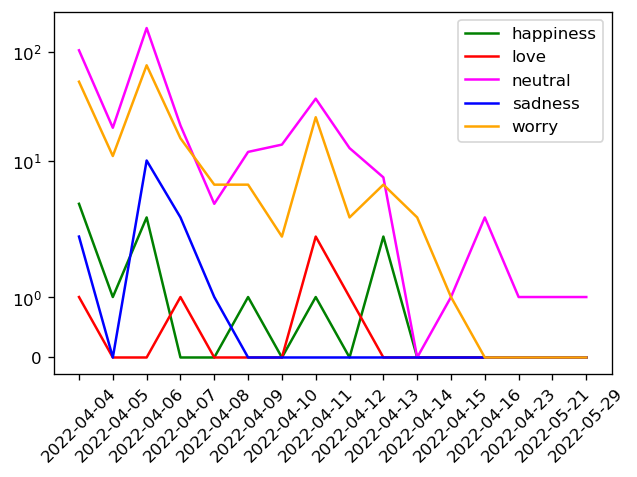

In [149]:
# listahappiness=[]
# listalove=[]
# listaneutral=[]
# listasadness=[]
# listaworry=[]

plt.plot(listaTempo,listahappiness,label = "happiness",color="green")
plt.plot(listaTempo,listalove,label = "love",color="red")
plt.plot(listaTempo,listaneutral,label = "neutral",color="magenta")
plt.plot(listaTempo,listasadness,label = "sadness",color="blue")
plt.plot(listaTempo,listaworry,label = "worry",color="orange")
plt.xticks(rotation = 45)
plt.yscale("symlog")
plt.legend()
plt.show()

https://public.flourish.studio/visualisation/10560334/

In [154]:
geoj=json.load(open("immagini/custom.geojson"))

In [159]:
dictGeo={"type":"FeatureCollection","features":[]}

In [161]:
geoj["features"][0]

{'type': 'Feature',
 'properties': {'scalerank': 1,
  'featurecla': 'Admin-0 country',
  'labelrank': 6,
  'sovereignt': 'Belize',
  'sov_a3': 'BLZ',
  'adm0_dif': 0,
  'level': 2,
  'type': 'Sovereign country',
  'admin': 'Belize',
  'adm0_a3': 'BLZ',
  'geou_dif': 0,
  'geounit': 'Belize',
  'gu_a3': 'BLZ',
  'su_dif': 0,
  'subunit': 'Belize',
  'su_a3': 'BLZ',
  'brk_diff': 0,
  'name': 'Belize',
  'name_long': 'Belize',
  'brk_a3': 'BLZ',
  'brk_name': 'Belize',
  'brk_group': None,
  'abbrev': 'Belize',
  'postal': 'BZ',
  'formal_en': 'Belize',
  'formal_fr': None,
  'note_adm0': None,
  'note_brk': None,
  'name_sort': 'Belize',
  'name_alt': None,
  'mapcolor7': 1,
  'mapcolor8': 4,
  'mapcolor9': 5,
  'mapcolor13': 7,
  'pop_est': 307899,
  'gdp_md_est': 2536,
  'pop_year': -99,
  'lastcensus': 2010,
  'gdp_year': -99,
  'economy': '6. Developing region',
  'income_grp': '4. Lower middle income',
  'wikipedia': -99,
  'fips_10': None,
  'iso_a2': 'BZ',
  'iso_a3': 'BLZ',
  'i

In [168]:
geoj["features"][0]["properties"]["sovereignt"]

'Belize'

In [175]:
dictLinguaComment.keys()

dict_keys(['english', 'chinese (simplified)', 'russian', 'ukrainian', 'belarusian', 'kazakh', 'italian', 'french', 'romanian', 'portuguese', 'greek', 'spanish', 'catalan', 'polish', 'ilocano', 'malayalam', 'german'])

In [171]:
for feature in geoj["features"]:
    tmp={
        "type":feature["type"],
        "properties":{
            "nome":feature["properties"]["sovereignt"]
            },
            "geometry":feature["geometry"]
            }
    dictGeo["features"].append(tmp)


In [172]:
json.dump(dictGeo,open("immagini/custom2.geojson","w"))